In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [55]:
df = pd.read_csv("/content/waterQuality1.csv")

# Data Analysis

In [56]:
#displaying the first five records of the data
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [57]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [58]:
df.shape

(7999, 21)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [60]:
print('number of null values: ',df.isnull().sum().sum())

number of null values:  0


In [61]:
print('number of duplicated records: ',df.duplicated().sum())

number of duplicated records:  0


In [62]:
#descriptive statistics review of the data
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [63]:
# Check class distribution for classification
print("\nClass distribution:")
print(df['is_safe'].value_counts())


Class distribution:
is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64


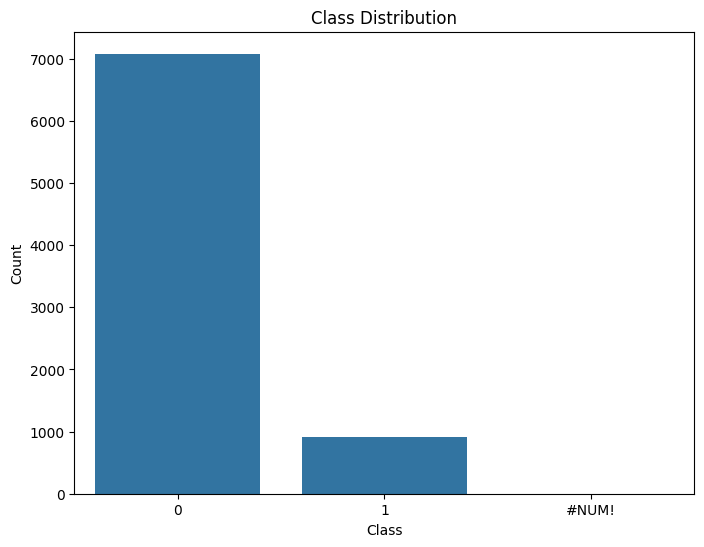

In [64]:
# Count the occurrences of each class in the 'is_safe' column
class_counts = df['is_safe'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [65]:
df = pd.read_csv('/content/waterQuality1.csv', na_values='#NUM!')

# Calculate correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

             aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.067369  0.225773  0.294145 -0.099911    0.369309   
ammonia       0.067369  1.000000  0.046783  0.070099 -0.006422    0.104775   
arsenic       0.225773  0.046783  1.000000  0.362945  0.334682    0.356559   
barium        0.294145  0.070099  0.362945  1.000000 -0.037803    0.446928   
cadmium      -0.099911 -0.006422  0.334682 -0.037803  1.000000   -0.144370   
chloramine    0.369309  0.104775  0.356559  0.446928 -0.144370    1.000000   
chromium      0.353218  0.124782  0.312475  0.415972 -0.157766    0.555938   
copper        0.168612  0.015953 -0.036444  0.065426 -0.109024    0.119059   
flouride     -0.009784 -0.028221  0.003792 -0.018548  0.004880    0.004400   
bacteria     -0.078238  0.063603  0.035688  0.101259 -0.092431    0.154510   
viruses      -0.070863  0.105856  0.011703 -0.002276  0.021183    0.003687   
lead          0.020792 -0.037065 -0.087756 -0.042888 -0.034959  

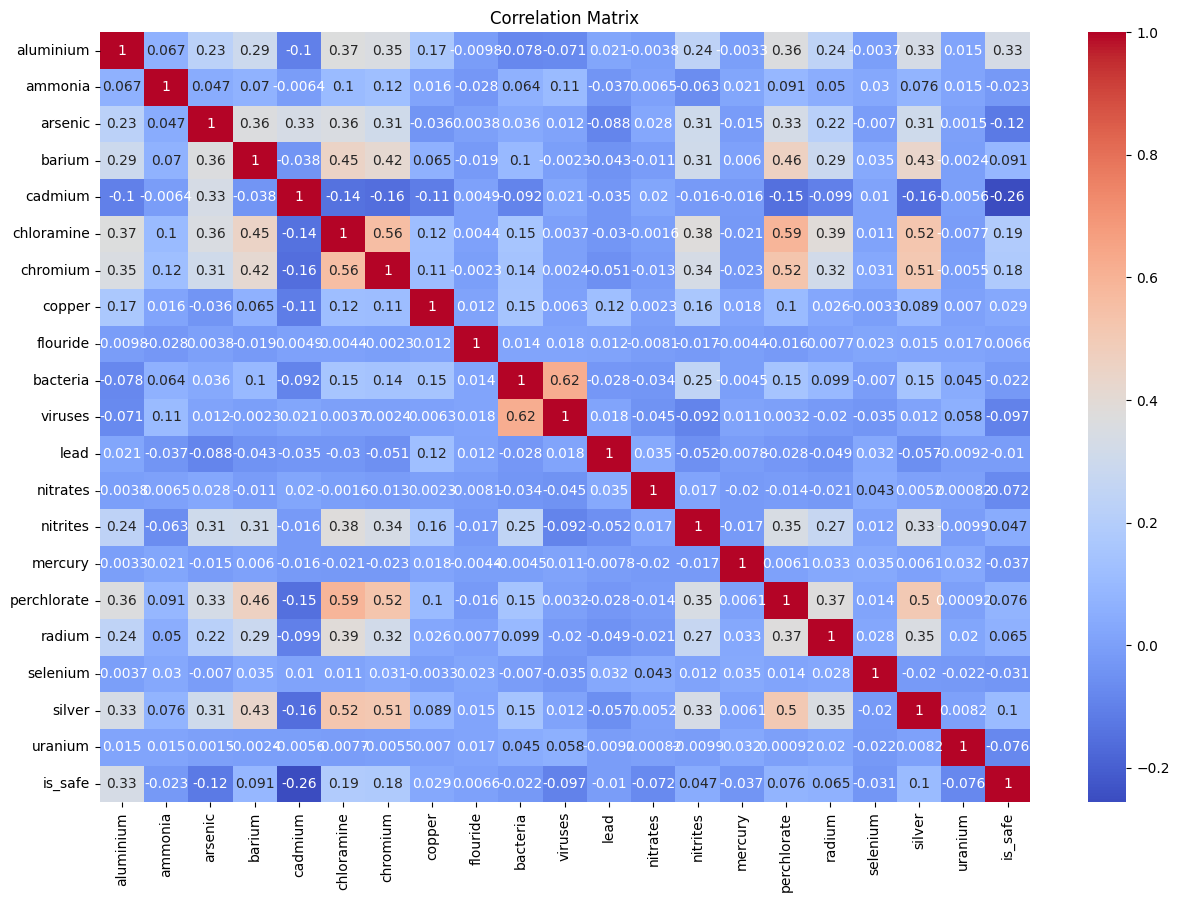

In [66]:
# Plot the correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(15,10))    #size
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Data Splitting into (training and testing)
- then we do data preprocessing and engineering to prevent data leakage

In [67]:
X = df.drop(columns=['is_safe'])
y = df['is_safe']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Scale the features to a range of [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [69]:
# Impute missing values in y_train
imputer_y = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1))

# Convert back to 1D array
y_train_imputed = y_train_imputed.ravel()

In [70]:
#feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train_imputed)
X_test_selected = selector.transform(X_test_scaled)

print("Shapes of transformed data after feature selection:")
print("X_train_selected:", X_train_selected.shape)
print("X_test_selected:", X_test_selected.shape)

Shapes of transformed data after feature selection:
X_train_selected: (6399, 5)
X_test_selected: (1600, 5)


In [71]:
# feature engineering
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Shapes of transformed data after feature engineering:")
print("X_train_poly:", X_train_poly.shape)
print("X_test_poly:", X_test_poly.shape)

Shapes of transformed data after feature engineering:
X_train_poly: (6399, 230)
X_test_poly: (1600, 230)


In [72]:
#PCA
#PCA to the scaled data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Print the shapes of transformed data after PCA
print("Shapes of transformed data after PCA:")
print("X_train_pca:", X_train_pca.shape)
print("X_test_pca:", X_test_pca.shape)

Shapes of transformed data after PCA:
X_train_pca: (6399, 5)
X_test_pca: (1600, 5)
